In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [4]:
model = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
)

In [5]:
data = torch.randn((1000, 20))
labels = torch.randint(low=0, high=2, size=(1, 1000))

In [6]:
model.to(device)

data = data.to(device)
labels = labels.to(device)

In [7]:
data

tensor([[-1.2780,  0.6873, -0.2112,  ...,  1.5976, -1.0305, -0.4868],
        [ 1.3772, -0.3291,  0.5088,  ...,  1.6652,  1.5252,  0.1703],
        [ 1.7838, -0.0592, -0.3226,  ..., -0.3800,  0.4361,  0.8814],
        ...,
        [ 1.0923, -1.0844,  2.8095,  ...,  0.2339,  0.2242,  1.0831],
        [-0.9253, -0.7984, -0.5930,  ...,  0.0952, -1.3918,  0.3747],
        [ 0.8083,  0.4641, -1.7692,  ..., -0.0410, -0.0390,  0.1107]],
       device='cuda:0')

In [9]:
dataG = torch.randn((1000, 20), device=device)
dataC = torch.randn((1000, 20), device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


In [10]:
output = model(data)

In [11]:
output.device

device(type='cuda', index=0)

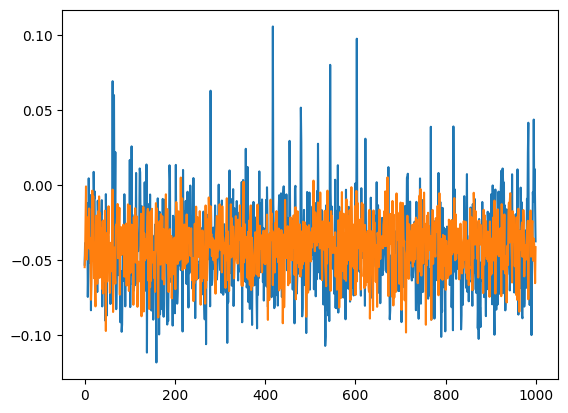

In [13]:
plt.plot(output.detach().cpu())

In [14]:
start_time = time.process_time()

device = 'cuda:0'
model.to(device)
data = data.to(device)
labels = labels.to(device)

output = model(data).detach().cpu()

GPUtime = 1000*(time.process_time() - start_time)

In [15]:
start_time = time.process_time()

device = 'cpu'
model.to(device)
data = data.to(device)
labels = labels.to(device)

output = model(data).detach().cpu()

CPUtime = 1000*(time.process_time() - start_time)

In [16]:
[CPUtime, GPUtime]

[20.56007700000073, 17.567506000000677]

In [17]:
model = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
)
data = torch.randn((1000, 20))

start_time = time.process_time()
output = model(data).detach()
CPUtime2 = 1000*(time.process_time() - start_time)

[CPUtime2, CPUtime, GPUtime]

[2.0653429999999418, 20.56007700000073, 17.567506000000677]